<a href="https://colab.research.google.com/github/swagata87/IITKanpurPhy654/blob/main/smallResnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!wget https://swmukher.web.cern.ch/swmukher/xyz_9.zip

In [2]:
#!unzip "/content/xyz_9.zip" -d "/content/dataset/"

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (Reshape,LeakyReLU,Dropout,Conv2DTranspose, Add, Conv2D, MaxPool2D, Dense,
                                     Flatten, InputLayer, BatchNormalization, Input, )
from tensorflow.keras.optimizers import Adam


In [5]:
#trial_dataset = tf.keras.preprocessing.image_dataset_from_directory(
#   "/content/dataset/xyz_9/", label_mode=None, batch_size=128)

In [6]:
#trial_dataset

### **Since there is only 1 class in the above dataset, its not suitable for classification problem. Let's load another dataset suitable for classification problem.**



In [8]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [9]:
len(train_images), len(test_images)

(50000, 10000)

In [10]:
import matplotlib.pyplot as plt

def show_images(train_images, class_names, train_labels, nb_samples = 12, nb_row = 4):
    plt.figure(figsize=(32, 32))
    for i in range(nb_samples):
        plt.subplot(nb_row, nb_row, i + 1)  # This line should be indented
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

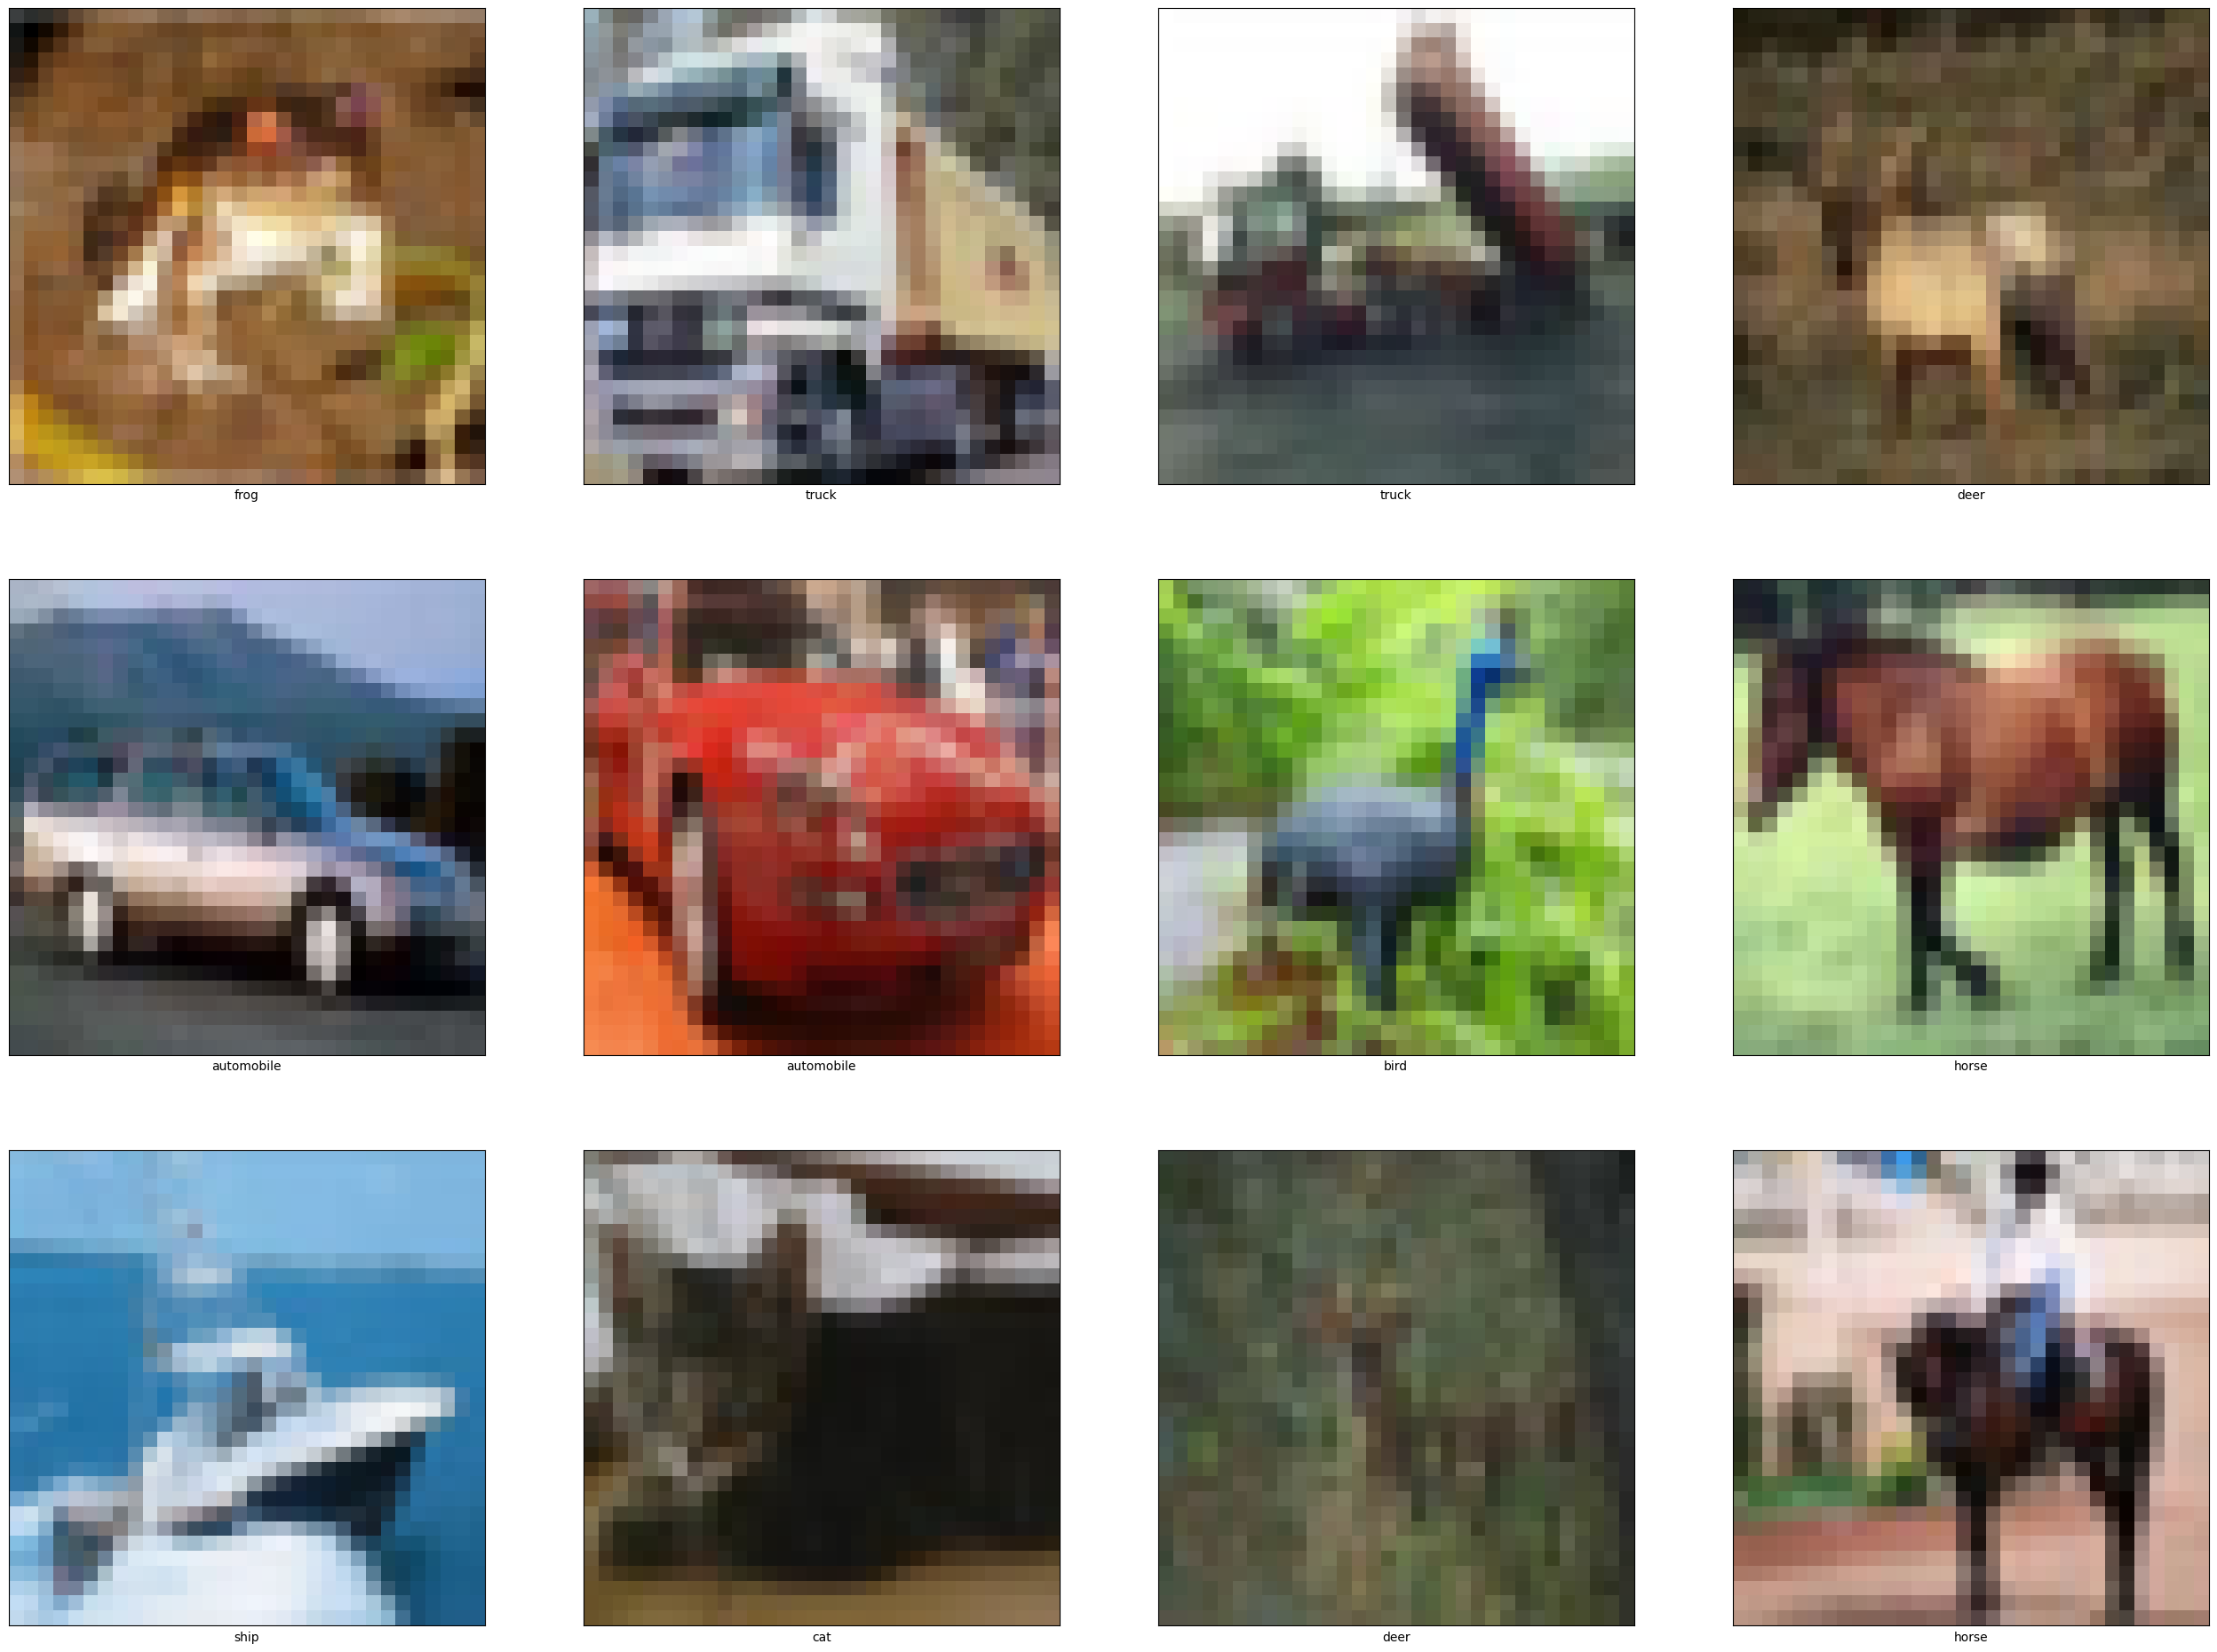

In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           	'dog', 'frog', 'horse', 'ship', 'truck']

show_images(train_images, class_names, train_labels)

In [12]:
NUM_CLASSES = len(class_names)
NUM_CLASSES

10

In [13]:
max_pixel_value = 255

train_images = train_images / max_pixel_value
test_images = test_images / max_pixel_value

In [14]:
print(np.shape(train_images))
print(np.shape(test_images))

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [15]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))

In [16]:
np.shape(train_labels)

(50000, 10)

In [17]:
np.shape(test_labels)

(10000, 10)

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
INPUT_SHAPE = (32, 32, 3)

In [19]:
from tensorflow.keras import layers
x = layers.Input(shape=INPUT_SHAPE, name="resnet")

encoder_conv_layer1 = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", strides=1, name="encoder_conv_1")(x)
encoder_norm_layer1 = tf.keras.layers.BatchNormalization(name="encoder_norm_1")(encoder_conv_layer1)
encoder_activ_layer1 = tf.keras.layers.LeakyReLU(name="encoder_leakyrelu_1")(encoder_norm_layer1)

skip_connection_1 = encoder_activ_layer1
skip_connection_1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(1,1), padding="same", strides=1, name="res1")(skip_connection_1)
print("skip 1 " , np.shape(skip_connection_1))

encoder_conv_layer2 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", strides=1, name="encoder_conv_2")(encoder_activ_layer1)
encoder_norm_layer2 = tf.keras.layers.BatchNormalization(name="encoder_norm_2")(encoder_conv_layer2)
print("skip 1 added to " ,np.shape(encoder_norm_layer2))
encoder_norm_layer2_added = Add()([encoder_norm_layer2, skip_connection_1])
encoder_activ_layer2 = tf.keras.layers.LeakyReLU(name="encoder_activ_layer_2")(encoder_norm_layer2_added)

skip_connection_2 = encoder_activ_layer2
skip_connection_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding="same", strides=2, name="res2")(skip_connection_2)
print("skip 2 " , np.shape(skip_connection_2))

encoder_conv_layer3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", strides=2, name="encoder_conv_3")(encoder_activ_layer2)
encoder_norm_layer3 = tf.keras.layers.BatchNormalization(name="encoder_norm_3")(encoder_conv_layer3)
print("skip 2 added to " ,np.shape(encoder_norm_layer3))
encoder_norm_layer3_added = Add()([encoder_norm_layer3, skip_connection_2])
encoder_activ_layer3 = tf.keras.layers.LeakyReLU(name="encoder_activ_layer_3")(encoder_norm_layer3_added)

skip_connection_3 = encoder_activ_layer3
skip_connection_3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(1,1), padding="same", strides=2, name="res3")(skip_connection_3)
print("skip 3 " , np.shape(skip_connection_3))

encoder_conv_layer4 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", strides=2, name="encoder_conv_4")(encoder_activ_layer3)
encoder_norm_layer4 = tf.keras.layers.BatchNormalization(name="encoder_norm_4")(encoder_conv_layer4)
print("skip 3 added to " ,np.shape(encoder_norm_layer4))
encoder_norm_layer4_added = Add()([encoder_norm_layer4, skip_connection_3])
encoder_activ_layer4 = tf.keras.layers.LeakyReLU(name="encoder_activ_layer_4")(encoder_norm_layer4_added)

encoder_conv_layer5 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", strides=1, name="encoder_conv_5")(encoder_activ_layer4)
encoder_norm_layer5 = tf.keras.layers.BatchNormalization(name="encoder_norm_5")(encoder_conv_layer5)
encoder_activ_layer5 = tf.keras.layers.LeakyReLU(name="encoder_activ_layer_5")(encoder_norm_layer5)

encoder_flatten = tf.keras.layers.Flatten()(encoder_activ_layer5)

my_dense = Dense(512, activation='relu')(encoder_flatten)
my_final = Dense(NUM_CLASSES, activation='softmax')(my_dense)
model = tf.keras.models.Model(x, my_final, name="myModel")

skip 1  (None, 32, 32, 32)
skip 1 added to  (None, 32, 32, 32)
skip 2  (None, 16, 16, 64)
skip 2 added to  (None, 16, 16, 64)
skip 3  (None, 8, 8, 64)
skip 3 added to  (None, 8, 8, 64)


In [20]:
my_final

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>

In [21]:
model.summary()

Model: "myModel"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 resnet (InputLayer)         [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 encoder_conv_1 (Conv2D)     (None, 32, 32, 16)           448       ['resnet[0][0]']              
                                                                                                  
 encoder_norm_1 (BatchNorma  (None, 32, 32, 16)           64        ['encoder_conv_1[0][0]']      
 lization)                                                                                        
                                                                                                  
 encoder_leakyrelu_1 (Leaky  (None, 32, 32, 16)           0         ['encoder_norm_1[0][0]']

In [114]:
#tf.keras.utils.plot_model(mynet,'model.png')


In [41]:
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE = 128
EPOCHS = 100

METRICS = metrics=['accuracy',
               	Precision(name='precision'),
               	Recall(name='recall')]

model.compile(optimizer='adam',
          	loss='categorical_crossentropy',
          	metrics = METRICS)

print (np.shape(train_images))
print (np.shape(train_labels))


# Train the model
training_history = model.fit(train_images, train_labels,
                	epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(test_images, test_labels))

(50000, 32, 32, 3)
(50000, 10)
Epoch 1/100
391/391 [==============================] - 12s 19ms/step - loss: 0.0896 - accuracy: 0.9687 - precision: 0.9712 - recall: 0.9659 - val_loss: 1.6780 - val_accuracy: 0.6810 - val_precision: 0.6957 - val_recall: 0.6686
Epoch 2/100
391/391 [==============================] - 7s 17ms/step - loss: 0.0646 - accuracy: 0.9779 - precision: 0.9795 - recall: 0.9764 - val_loss: 1.6585 - val_accuracy: 0.7041 - val_precision: 0.7147 - val_recall: 0.6956
Epoch 3/100
391/391 [==============================] - 7s 17ms/step - loss: 0.0480 - accuracy: 0.9835 - precision: 0.9845 - recall: 0.9823 - val_loss: 1.8571 - val_accuracy: 0.6967 - val_precision: 0.7092 - val_recall: 0.6893
Epoch 4/100
391/391 [==============================] - 7s 18ms/step - loss: 0.0605 - accuracy: 0.9785 - precision: 0.9797 - recall: 0.9773 - val_loss: 1.8141 - val_accuracy: 0.7066 - val_precision: 0.7167 - val_recall: 0.7013
Epoch 5/100
391/391 [==============================] - 7s 17ms/s

In [42]:
def show_performance_curve(training_result, metric, metric_label):

	train_perf = training_result.history[str(metric)]
	validation_perf = training_result.history['val_'+str(metric)]

	plt.plot(train_perf, label=metric_label)
	plt.plot(validation_perf, label = 'val_'+str(metric))

	plt.xlabel('Epoch')
	plt.ylabel(metric_label)
	plt.legend(loc='lower right')

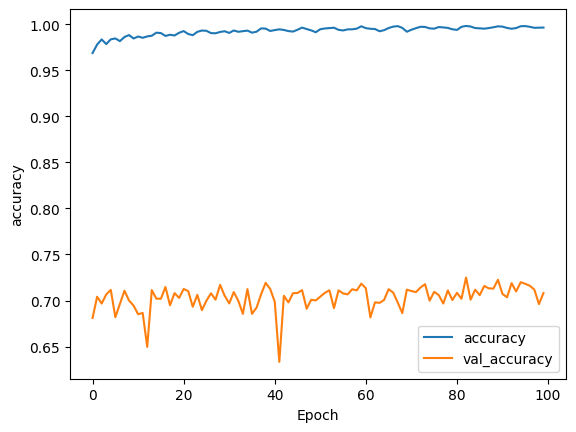

In [43]:
show_performance_curve(training_history, 'accuracy', 'accuracy')

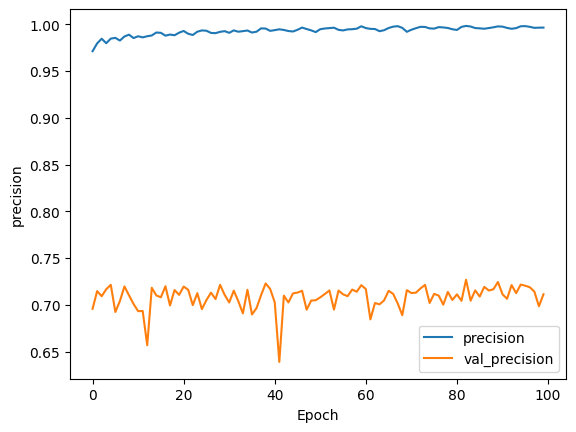

In [44]:
show_performance_curve(training_history, 'precision', 'precision')

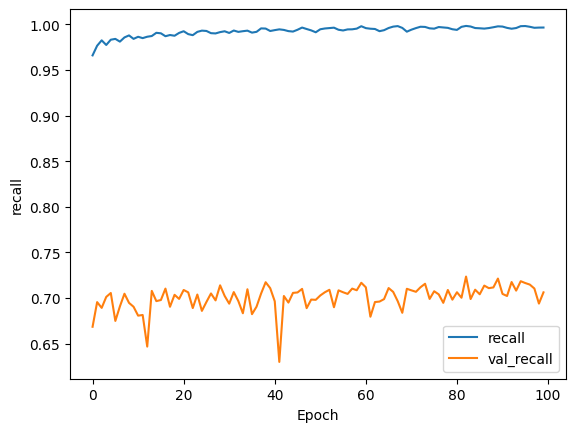

In [45]:
show_performance_curve(training_history, 'recall', 'recall')

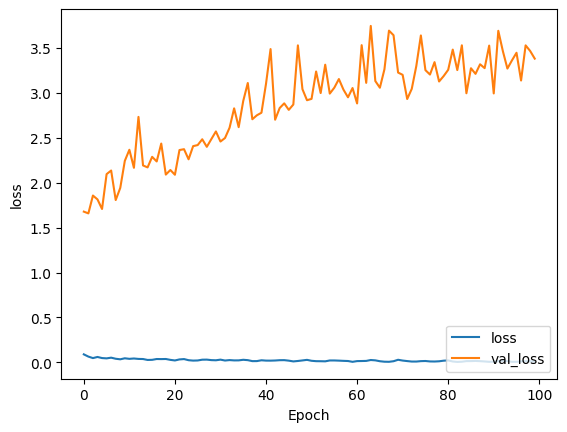

In [46]:
show_performance_curve(training_history, 'loss', 'loss')

313/313 [==============================] - 1s 2ms/step


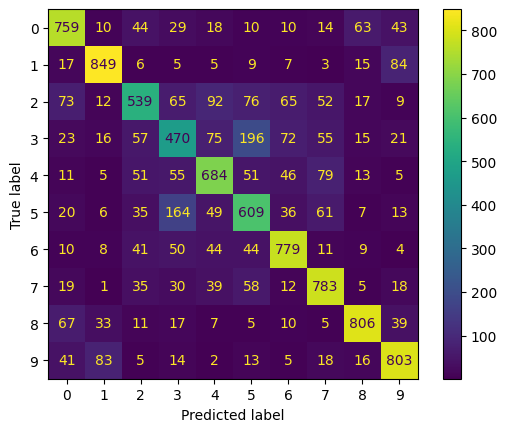

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_predictions = model.predict(test_images)

test_predicted_labels = np.argmax(test_predictions, axis=1)

test_true_labels = np.argmax(test_labels, axis=1)

cm = confusion_matrix(test_true_labels, test_predicted_labels)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

# **NOW try a CNN**

In [49]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Variables
INPUT_SHAPE = (32, 32, 3)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3, 3)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

# Model architecture implementation
model2 = Sequential()
model2.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu', input_shape=INPUT_SHAPE))
model2.add(MaxPooling2D(POOL_SHAPE))
model2.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model2.add(MaxPooling2D(POOL_SHAPE))
model2.add(Flatten())
model2.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model2.add(Dense(NUM_CLASSES, activation='softmax'))

In [50]:
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE = 128
EPOCHS = 100

METRICS = metrics=['accuracy',
               	Precision(name='precision'),
               	Recall(name='recall')]

model2.compile(optimizer='adam',
          	loss='categorical_crossentropy',
          	metrics = METRICS)

print (np.shape(train_images))
print (np.shape(train_labels))


# Train the model
training_history = model2.fit(train_images, train_labels,
                	epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(test_images, test_labels))

(50000, 32, 32, 3)
(50000, 10)
Epoch 1/100
391/391 [==============================] - 6s 9ms/step - loss: 1.5242 - accuracy: 0.4540 - precision: 0.7011 - recall: 0.2027 - val_loss: 1.2706 - val_accuracy: 0.5522 - val_precision: 0.7187 - val_recall: 0.3575
Epoch 2/100
391/391 [==============================] - 2s 6ms/step - loss: 1.2035 - accuracy: 0.5775 - precision: 0.7446 - recall: 0.3896 - val_loss: 1.1747 - val_accuracy: 0.5871 - val_precision: 0.7398 - val_recall: 0.4216
Epoch 3/100
391/391 [==============================] - 2s 6ms/step - loss: 1.0765 - accuracy: 0.6241 - precision: 0.7656 - recall: 0.4693 - val_loss: 1.0246 - val_accuracy: 0.6462 - val_precision: 0.7673 - val_recall: 0.5047
Epoch 4/100
391/391 [==============================] - 2s 6ms/step - loss: 0.9866 - accuracy: 0.6567 - precision: 0.7818 - recall: 0.5252 - val_loss: 0.9980 - val_accuracy: 0.6538 - val_precision: 0.7659 - val_recall: 0.5326
Epoch 5/100
391/391 [==============================] - 3s 7ms/step - 

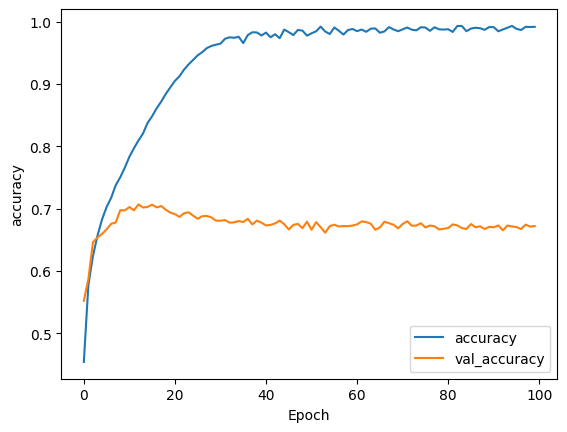

In [51]:
show_performance_curve(training_history, 'accuracy', 'accuracy')

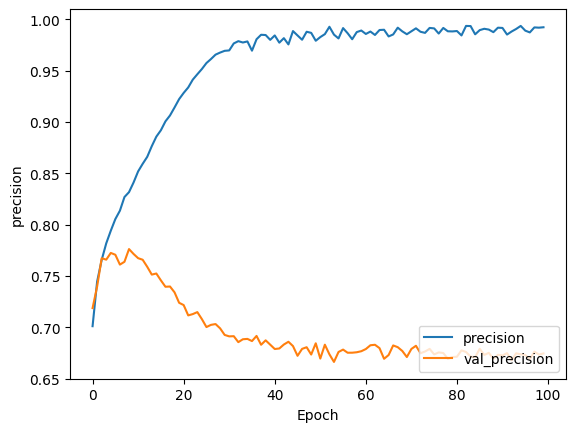

In [52]:
show_performance_curve(training_history, 'precision', 'precision')

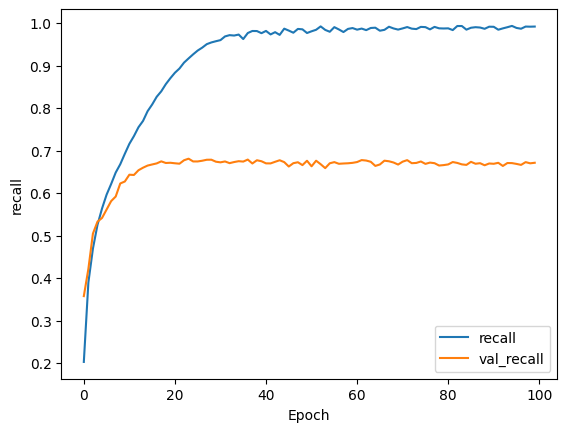

In [53]:
show_performance_curve(training_history, 'recall', 'recall')

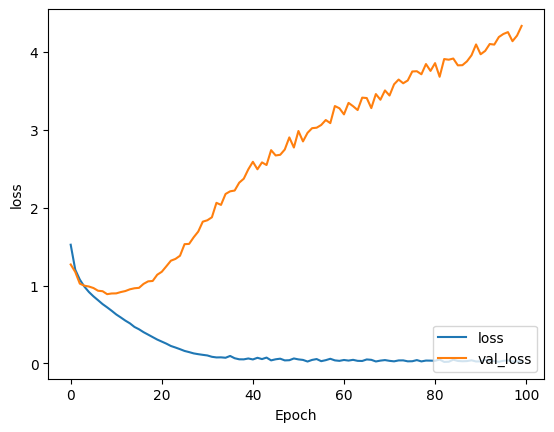

In [55]:
show_performance_curve(training_history, 'loss', 'loss')

313/313 [==============================] - 1s 3ms/step


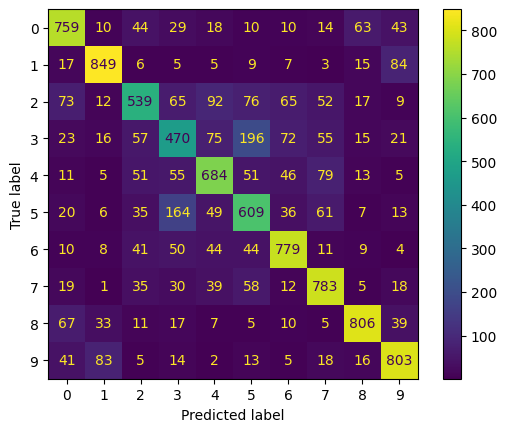

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_predictions = model.predict(test_images)

test_predicted_labels = np.argmax(test_predictions, axis=1)

test_true_labels = np.argmax(test_labels, axis=1)

cm = confusion_matrix(test_true_labels, test_predicted_labels)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()